<a href="https://colab.research.google.com/github/piaseckazaneta/Python/blob/main/Python_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing required libraries

This command installs the required Python libraries in the Colab environment:

- geopandas – for working with geospatial vector data

- matplotlib – for plotting maps and charts

- requests – for downloading files from the internet

Colab does not keep installed libraries between sessions, so this step is required.

In [1]:
!pip install matplotlib geopandas requests

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

Downloading the dataset (Warsaw districts)

This code sends an HTTP GET request to download a GeoJSON file containing the administrative boundaries of Warsaw districts from GitHub.

In [3]:
url = "https://raw.githubusercontent.com/andilabs/warszawa-dzielnice-geojson/master/warszawa-dzielnice.geojson"
r = requests.get(url)

Saving the downloaded file locally

Explanation:
The downloaded content is saved as a local file in the Colab runtime:

- "wb" means write binary

- this allows GeoPandas to read the file in the next step


In [4]:
with open("warszawa-dzielnice.geojson", "wb") as f:
  f.write(r.content)

print("Plik dzielnic pobrany pomyślnie")

Plik dzielnic pobrany pomyślnie


Loading the GeoJSON into GeoPandas

This reads the GeoJSON file and loads it into a GeoDataFrame, which is a Pandas DataFrame with a geometry column.

In [5]:
districts_gdf = gpd.read_file("warszawa-dzielnice.geojson")

Exploring the dataset structure

info() shows the columns, data types, and geometry type

head() displays the first few rows to understand the attribute data

This is a standard first step in any data analysis workflow.

In [6]:
print("📊 Info o geometrii i kolumnach:")
print(districts_gdf.info())
print(districts_gdf.head())

📊 Info o geometrii i kolumnach:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  19 non-null     int32   
 1   name        19 non-null     object  
 2   geometry    19 non-null     geometry
dtypes: geometry(1), int32(1), object(1)
memory usage: 512.0+ bytes
None
   cartodb_id       name                                           geometry
0           1   Warszawa  MULTIPOLYGON (((21.02753 52.36513, 21.02539 52...
1          22     Ochota  MULTIPOLYGON (((21.00152 52.22807, 20.99059 52...
2          25  Rembertów  MULTIPOLYGON (((21.13242 52.23909, 21.13313 52...
3           2     Bemowo  MULTIPOLYGON (((20.87309 52.21666, 20.87307 52...
4          19  Białołęka  MULTIPOLYGON (((20.99622 52.28734, 20.99782 52...


Plotting a basic map

This creates a simple static map of Warsaw districts:

- figsize controls the map size

- edgecolor highlights district borders

- axes are turned off for a cleaner cartographic output

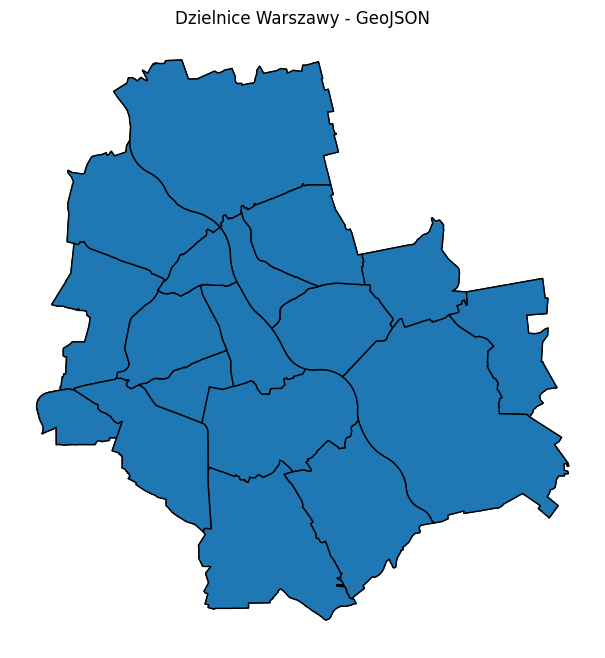

In [7]:
ax = districts_gdf.plot(figsize=(8, 8), edgecolor='black', column=None)
ax.set_title("Dzielnice Warszawy - GeoJSON")
plt.axis('off')
plt.show()


Python variables & types (using Warsaw districts)

In [8]:
type(districts_gdf)

geopandas.geodataframe.GeoDataFrame

In [9]:
city_name = "Warsaw"
number_of_districts = (len(districts_gdf))

In [10]:
print(type(city_name))
print(type(number_of_districts))

<class 'str'>
<class 'int'>


In [11]:
print(districts_gdf.crs)

EPSG:4326


In [12]:
districts_gdf_projected = districts_gdf.to_crs(epsg=2180)
print(districts_gdf_projected.crs)

EPSG:2180


In [13]:
districts_gdf_projected["area_m2"] = districts_gdf_projected.geometry.area

In [14]:
districts_gdf_projected

,cartodb_id,name,geometry,area_m2
0,1,Warszawa,"MULTIPOLYGON (((638006.999 501843.502, 637866....",5.168868e+08
1,22,Ochota,"MULTIPOLYGON (((636658.397 486555.359, 635919....",9.680919e+06
2,25,Rembertów,"MULTIPOLYGON (((645558.589 488036.332, 645605....",1.929143e+07
3,2,Bemowo,"MULTIPOLYGON (((627922.583 485053.359, 627921....",2.496911e+07
4,19,Białołęka,"MULTIPOLYGON (((636114.73 493135.194, 636221.6...",7.306188e+07
5,31,Wesoła,"MULTIPOLYGON (((654484.596 485077.679, 654402....",2.293394e+07
6,20,Bielany,"MULTIPOLYGON (((627976.969 493665.377, 627941....",3.229142e+07
7,21,Mokotów,"MULTIPOLYGON (((638727.391 484253.046, 638710....",3.557523e+07
8,23,Praga Południe,"MULTIPOLYGON (((642937.562 485314.028, 643191....",2.232466e+07
9,24,Praga Północ,"MULTIPOLYGON (((637243.873 494002.159, 637233....",1.140738e+07


In [15]:
first_area = districts_gdf_projected["area_m2"].iloc[0]
type(first_area)

numpy.float64

In [16]:
first_district_name = districts_gdf_projected["name"].iloc[0]

In [17]:
print(first_district_name)

Warszawa


In [18]:
type(first_district_name)

str

In [19]:
label = f"District: {first_district_name}"
print(label)

District: Warszawa


In [20]:
district_names = list(districts_gdf_projected["name"])
type(district_names)


list

In [21]:
type(district_names[0])

str

Python data types learned today:
- GeoDataFrame (spatial table)
- int (counts, indices)
- float (areas, distances)
- str (district names, labels)
- list (collections of district names)

Day 3 – Python lists and iteration (using Warsaw districts)

Creating a list from a GeoDataFrame

A Python list can be created directly from a GeoDataFrame column to work with attribute values independently from geometry.

In [22]:
districts_names = list(districts_gdf["name"])

List indexing

Lists are zero-indexed in Python, which allows direct access to specific elements by position.

In [23]:
districts_names[0]

'Warszawa'

In [24]:
first_district = districts_names[0]
last_district = districts_names[-1]

Iterating over a list

A for loop executes the same operation for each element in a list, enabling batch processing of spatial entities.

In [25]:
for district in districts_names:
  print(district)

Warszawa
Ochota
Rembertów
Bemowo
Białołęka
Wesoła
Bielany
Mokotów
Praga Południe
Praga Północ
Śródmieście
Targówek
Ursus
Wola
Ursynów
Wawer
Wilanów
Włochy
Żoliborz


Using list values to filter a GeoDataFrame

List elements can be used as dynamic filters to select spatial features from a GeoDataFrame.

In [26]:
for district in districts_names:
  geom = districts_gdf_projected[districts_gdf_projected["name"] == district].geometry

Collecting results in a list

Lists are commonly used to accumulate numerical results (e.g. areas) generated during spatial analysis loops.

In [27]:
areas = []
for district in districts_names:
  area = districts_gdf_projected[districts_gdf_projected["name"] == district].geometry.area.values[0]
  areas.append(area)

In [28]:
print(type(areas))
print(len(areas))

<class 'list'>
19


Pairing values using zip()

The zip() function combines multiple lists into structured pairs, which is useful for building tables and summaries.

In [29]:
district_area_pairs = list(zip(districts_names, areas))
district_area_pairs

[('Warszawa', np.float64(516886839.53242576)),
 ('Ochota', np.float64(9680918.846873578)),
 ('Rembertów', np.float64(19291430.02839642)),
 ('Bemowo', np.float64(24969109.310506955)),
 ('Białołęka', np.float64(73061877.60451895)),
 ('Wesoła', np.float64(22933939.831140257)),
 ('Bielany', np.float64(32291417.933313172)),
 ('Mokotów', np.float64(35575226.84906865)),
 ('Praga Południe', np.float64(22324657.260164324)),
 ('Praga Północ', np.float64(11407382.349971365)),
 ('Śródmieście', np.float64(15597598.955951367)),
 ('Targówek', np.float64(24115466.34435755)),
 ('Ursus', np.float64(9341462.84463125)),
 ('Wola', np.float64(19369692.841326162)),
 ('Ursynów', np.float64(44016922.8813024)),
 ('Wawer', np.float64(79588377.46449468)),
 ('Wilanów', np.float64(36451153.25871982)),
 ('Włochy', np.float64(28518232.18604057)),
 ('Żoliborz', np.float64(8351972.741647601))]

Iterating over GeoDataFrame rows

iterrows() allows row-by-row access to attributes and geometry, bridging Python iteration with spatial objects.



In [30]:
for idx, row in districts_gdf_projected.iterrows():
  print(row["name"])
  print(row.geometry)

Warszawa
MULTIPOLYGON (((638006.9987609453 501843.50193492044, 637866.8410165876 501643.41268118937, 637845.6314282075 501366.99062601384, 637802.7632940006 501263.09224222973, 637752.524811766 500979.4052764941, 637625.4140279422 500898.63259025663, 637568.1501511136 500921.9559043404, 637090.0843170093 500805.7028373545, 637067.1493402988 500892.9637139952, 636836.2727163016 500883.2045165347, 636760.2813400535 500918.7008401174, 636719.3809271483 501037.39707687125, 636713.5898145174 501250.8644648008, 636706.6997403672 501253.6772969095, 636522.4841821807 501686.725622626, 636435.6566749704 501656.61358160153, 636357.7914116762 501632.4258363331, 636282.1116825835 501622.7642217735, 636136.9882997652 501584.8133134926, 636100.6064574121 501570.3444065247, 636070.4210695034 501538.6898382958, 636044.4223780874 501513.2706911173, 635939.6422627575 501469.54244565126, 635894.6531198461 501446.047616018, 635805.660037324 501422.5630920511, 635780.7802755267 501413.3095438676, 635591.86

Day 3 summary:
- list: ordered collection of values
- indexing: access elements by position
- for loop: iterate over districts
- lists are used to collect analysis results
- iteration connects Python logic with spatial data

Day 4 - Python dictionaries and functions (using Warsaw districts)

Creating a dictionary from district data

In [31]:
district_area_dict = {}

In [32]:
for idx, row in districts_gdf_projected.iterrows():
  district_area_dict[row["name"]] = row.geometry.area

In [33]:
print(district_area_dict)

{'Warszawa': 516886839.53242576, 'Ochota': 9680918.846873578, 'Rembertów': 19291430.02839642, 'Bemowo': 24969109.310506955, 'Białołęka': 73061877.60451895, 'Wesoła': 22933939.831140257, 'Bielany': 32291417.933313172, 'Mokotów': 35575226.84906865, 'Praga Południe': 22324657.260164324, 'Praga Północ': 11407382.349971365, 'Śródmieście': 15597598.955951367, 'Targówek': 24115466.34435755, 'Ursus': 9341462.84463125, 'Wola': 19369692.841326162, 'Ursynów': 44016922.8813024, 'Wawer': 79588377.46449468, 'Wilanów': 36451153.25871982, 'Włochy': 28518232.18604057, 'Żoliborz': 8351972.741647601}


In [34]:
districts_gdf_projected.iterrows()

<generator object DataFrame.iterrows at 0x7891f259bbc0>

Accessing dictionary values

In [35]:
district_area_dict["Mokotów"]

35575226.84906865

Writing a function to convert area units

In [36]:
def area_m2_to_ha(area_m2):
  return area_m2/10000

In [37]:
area_m2_to_ha(district_area_dict["Mokotów"])

3557.522684906865

In [38]:
def double(x):
  return x*2

In [39]:
double(district_area_dict["Wola"])

38739385.682652324

Applying a function to dictionary values

In [40]:
district_area_ha_dict = {}
for district, area_m2 in district_area_dict.items():
  district_area_ha_dict[district] = area_m2_to_ha(area_m2)

Updating the GeoDataFrame using a function

Functions can be applied directly to GeoDataFrame columns for clean, vectorized calculations.

In [41]:
districts_gdf_projected["area_ha"] = districts_gdf_projected.geometry.area.apply(area_m2_to_ha)

Writing a function that works on GeoDataFrames

Functions can operate on entire GeoDataFrames, enabling reusable GIS workflows

In [42]:
def add_area_ha(gdf):
  gdf["area_ha"] = gdf.geometry.area/10000
  return gdf

In [43]:
add_area_ha(districts_gdf_projected)

,cartodb_id,name,geometry,area_m2,area_ha
0,1,Warszawa,"MULTIPOLYGON (((638006.999 501843.502, 637866....",5.168868e+08,51688.683953
1,22,Ochota,"MULTIPOLYGON (((636658.397 486555.359, 635919....",9.680919e+06,968.091885
2,25,Rembertów,"MULTIPOLYGON (((645558.589 488036.332, 645605....",1.929143e+07,1929.143003
3,2,Bemowo,"MULTIPOLYGON (((627922.583 485053.359, 627921....",2.496911e+07,2496.910931
4,19,Białołęka,"MULTIPOLYGON (((636114.73 493135.194, 636221.6...",7.306188e+07,7306.187760
5,31,Wesoła,"MULTIPOLYGON (((654484.596 485077.679, 654402....",2.293394e+07,2293.393983
6,20,Bielany,"MULTIPOLYGON (((627976.969 493665.377, 627941....",3.229142e+07,3229.141793
7,21,Mokotów,"MULTIPOLYGON (((638727.391 484253.046, 638710....",3.557523e+07,3557.522685
8,23,Praga Południe,"MULTIPOLYGON (((642937.562 485314.028, 643191....",2.232466e+07,2232.465726
9,24,Praga Północ,"MULTIPOLYGON (((637243.873 494002.159, 637233....",1.140738e+07,1140.738235


Storing multiple metrics in one dictionary

Nested dictionaries allow structured storage of multiple spatial metrics per feature.

In [44]:
district_metrics = {}

for idx, row in districts_gdf_projected.iterrows():
  district_metrics[row["name"]] = {
      "area_ha": row["area_ha"],
      "geometry_type": row.geometry.geom_type
  }

Day 5 – Python if / else and conditional logic (using Warsaw districts)

if / else allows the code to make decisions based on spatial attributes

Simple condition on a numeric value

In [45]:
area_limit = 3000

In [46]:
for idx, row in districts_gdf_projected.iterrows():
  if row["area_ha"] > area_limit:
    category = "large"
  else:
    category = "small"
  print(row["name"], category)

Warszawa large
Ochota small
Rembertów small
Bemowo small
Białołęka large
Wesoła small
Bielany large
Mokotów large
Praga Południe small
Praga Północ small
Śródmieście small
Targówek small
Ursus small
Wola small
Ursynów large
Wawer large
Wilanów large
Włochy small
Żoliborz small


Creating a classification dictionary

Conditional logic can be used to classify spatial features into meaningful categories

In [47]:
district_size_class = {}

In [48]:
for idx, row in districts_gdf_projected.iterrows():
  if row["area_ha"] > area_limit:
    district_size_class[row["name"]] = "large"
  else:
    district_size_class[row["name"]] = "small"

print(district_size_class)

{'Warszawa': 'large', 'Ochota': 'small', 'Rembertów': 'small', 'Bemowo': 'small', 'Białołęka': 'large', 'Wesoła': 'small', 'Bielany': 'large', 'Mokotów': 'large', 'Praga Południe': 'small', 'Praga Północ': 'small', 'Śródmieście': 'small', 'Targówek': 'small', 'Ursus': 'small', 'Wola': 'small', 'Ursynów': 'large', 'Wawer': 'large', 'Wilanów': 'large', 'Włochy': 'small', 'Żoliborz': 'small'}


Adding a conditional column to GeoDataFrame

Conditional rules can be applied directly to GeoDataFrame columns

In [49]:
districts_gdf_projected["class_size"] = districts_gdf_projected["area_ha"].apply(lambda x: "large" if x > area_limit else "small")
print(districts_gdf_projected)

    cartodb_id            name  \
0            1        Warszawa   
1           22          Ochota   
2           25       Rembertów   
3            2          Bemowo   
4           19       Białołęka   
5           31          Wesoła   
6           20         Bielany   
7           21         Mokotów   
8           23  Praga Południe   
9           24    Praga Północ   
10          26     Śródmieście   
11          27        Targówek   
12          28           Ursus   
13          34            Wola   
14          29         Ursynów   
15          30           Wawer   
16          32         Wilanów   
17          33          Włochy   
18          35        Żoliborz   

                                             geometry       area_m2  \
0   MULTIPOLYGON (((638006.999 501843.502, 637866....  5.168868e+08   
1   MULTIPOLYGON (((636658.397 486555.359, 635919....  9.680919e+06   
2   MULTIPOLYGON (((645558.589 488036.332, 645605....  1.929143e+07   
3   MULTIPOLYGON (((627922.583 4850

Multiple conditions (and, or)

Multiple conditions allow more nuanced spatial classification.

In [50]:
districts_gdf_projected["size_label"] = districts_gdf_projected["area_ha"].apply(lambda x: "very large" if x > 4000 else "medium" if x > 2000 else "small")

Filtering districts using conditions

Conditions can be used to subset spatial data for focused analysis.

In [51]:
large_districts = districts_gdf_projected[districts_gdf_projected["area_ha"] > 3000]
print(large_districts)

    cartodb_id       name                                           geometry  \
0            1   Warszawa  MULTIPOLYGON (((638006.999 501843.502, 637866....   
4           19  Białołęka  MULTIPOLYGON (((636114.73 493135.194, 636221.6...   
6           20    Bielany  MULTIPOLYGON (((627976.969 493665.377, 627941....   
7           21    Mokotów  MULTIPOLYGON (((638727.391 484253.046, 638710....   
14          29    Ursynów  MULTIPOLYGON (((635461.46 475553.146, 635467.1...   
15          30      Wawer  MULTIPOLYGON (((643860.912 482980.442, 643899....   
16          32    Wilanów  MULTIPOLYGON (((645993.081 475132.107, 646094....   

         area_m2       area_ha class_size  size_label  
0   5.168868e+08  51688.683953      large  very large  
4   7.306188e+07   7306.187760      large  very large  
6   3.229142e+07   3229.141793      large      medium  
7   3.557523e+07   3557.522685      large      medium  
14  4.401692e+07   4401.692288      large  very large  
15  7.958838e+07   7958

In [52]:
large_districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 7 entries, 0 to 16
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  7 non-null      int32   
 1   name        7 non-null      object  
 2   geometry    7 non-null      geometry
 3   area_m2     7 non-null      float64 
 4   area_ha     7 non-null      float64 
 5   class_size  7 non-null      object  
 6   size_label  7 non-null      object  
dtypes: float64(2), geometry(1), int32(1), object(3)
memory usage: 420.0+ bytes


Conditional logic for analysis questions

Conditional logic translates analytical reasoning into code.

In [53]:
for idx, row in districts_gdf_projected.iterrows():
  if row["area_ha"] > 3000:
    result = "This district requires area-based analysis"
  else:
    result = "This district is suitable for local-scale analysis"
  print(row["name"], result)

Warszawa This district requires area-based analysis
Ochota This district is suitable for local-scale analysis
Rembertów This district is suitable for local-scale analysis
Bemowo This district is suitable for local-scale analysis
Białołęka This district requires area-based analysis
Wesoła This district is suitable for local-scale analysis
Bielany This district requires area-based analysis
Mokotów This district requires area-based analysis
Praga Południe This district is suitable for local-scale analysis
Praga Północ This district is suitable for local-scale analysis
Śródmieście This district is suitable for local-scale analysis
Targówek This district is suitable for local-scale analysis
Ursus This district is suitable for local-scale analysis
Wola This district is suitable for local-scale analysis
Ursynów This district requires area-based analysis
Wawer This district requires area-based analysis
Wilanów This district requires area-based analysis
Włochy This district is suitable for loca

Day 5 – Summary

By the end of Day 5, you can:

use if / else to classify spatial features

apply logical rules to GeoDataFrame columns

filter datasets using conditions

express analytical decisions in Python code

Day 6 - Pandas: filtering & groupby (geospatial context)

Attribute-based filtering (row selection)

In [54]:
large_districts = districts_gdf_projected[districts_gdf_projected["area_ha"] > 3000]

What happens

- a boolean condition is evaluated per row

- only rows where the condition is True are kept

Filtering selects rows, not columns, based on attribute logic.

Grouping districts by size class

In [55]:
districts_gdf_projected.head()

,cartodb_id,name,geometry,area_m2,area_ha,class_size,size_label
0,1,Warszawa,"MULTIPOLYGON (((638006.999 501843.502, 637866....",5.168868e+08,51688.683953,large,very large
1,22,Ochota,"MULTIPOLYGON (((636658.397 486555.359, 635919....",9.680919e+06,968.091885,small,small
2,25,Rembertów,"MULTIPOLYGON (((645558.589 488036.332, 645605....",1.929143e+07,1929.143003,small,small
3,2,Bemowo,"MULTIPOLYGON (((627922.583 485053.359, 627921....",2.496911e+07,2496.910931,small,medium
4,19,Białołęka,"MULTIPOLYGON (((636114.73 493135.194, 636221.6...",7.306188e+07,7306.187760,large,very large


In [56]:
area_by_class_size = (
    districts_gdf_projected
    .groupby("class_size")["area_ha"]
    .sum()
    .reset_index
    )

print(area_by_class_size)

<bound method Series.reset_index of class_size
large    81787.181552
small    21590.186354
Name: area_ha, dtype: float64>


Co to robi logicznie:

tworzy 2 grupy: large, small

sumuje powierzchnię w każdej grupie

Counting districts per group

.size() counts rows in each group.

In [57]:
district_count = (
    districts_gdf_projected
    .groupby("class_size")
    .size()
    .reset_index(name="district_count")
)

print(district_count)

  class_size  district_count
0      large               7
1      small              12


Day 7 -Pandas: basic plots (from analysis to visualization)

Aggregate area by size class (recap)

In [58]:
area_by_class_size = (
    districts_gdf_projected
    .groupby("class_size")["area_ha"]
    .sum()
    .reset_index()
)

Simple bar plot using Pandas

<Axes: xlabel='class_size'>

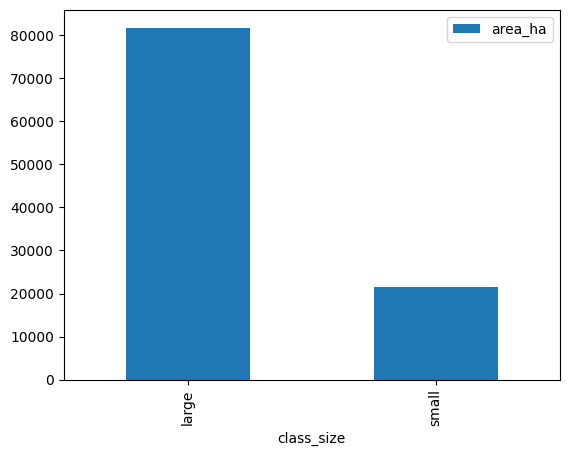

In [59]:
area_by_class_size.plot(
    x = "class_size",
    y = "area_ha",
    kind="bar",
    legend=True
)

Pandas uses Matplotlib internally

categories → x-axis

numeric values → y-axis

Pandas plots are fast and perfect for exploratory analysis.

Sorting before plotting (important)

Always control ordering before visualization.

In [60]:
area_by_class_size_sorted = area_by_class_size.sort_values(
    by = "area_ha",
    ascending = True
)

<Axes: xlabel='class_size'>

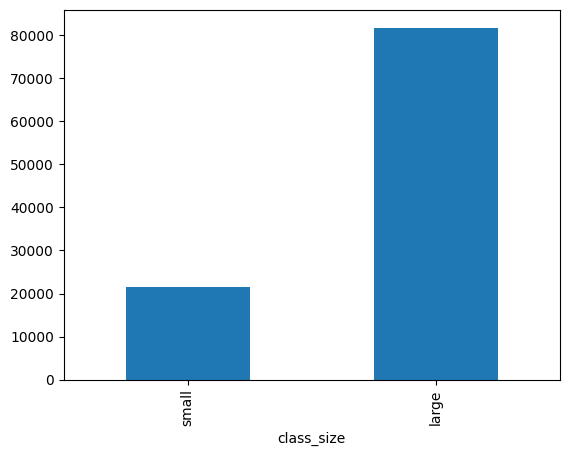

In [61]:
area_by_class_size_sorted.plot(
    x = "class_size",
    y = "area_ha",
    kind = "bar",
    legend = False
)

Rename columns for readability

In [62]:
area_ha_class_size_sorted = area_by_class_size_sorted.rename(
    columns = {"area_ha": "total_area_ha"}
)

Add title and labels (minimal)

Text(0, 0.5, 'Area (ha)')

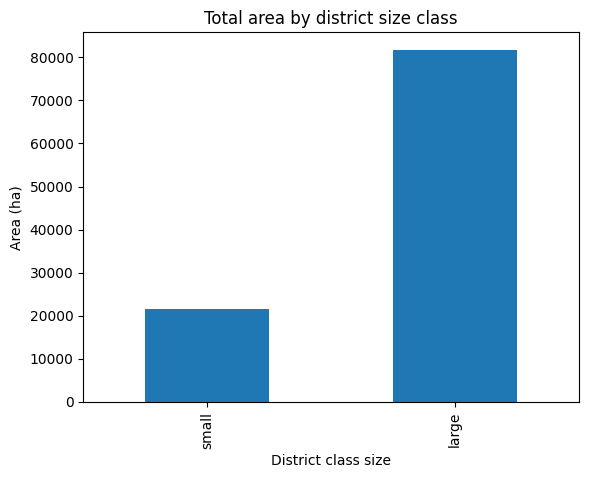

In [63]:
ax = area_ha_class_size_sorted.plot(
    x = "class_size",
    y = "total_area_ha",
    kind = "bar",
    legend = False
)

ax.set_title("Total area by district size class")
ax.set_xlabel("District class size")
ax.set_ylabel("Area (ha)")


In [64]:
area_ha_class_size_sorted

,class_size,total_area_ha
1,small,21590.186354
0,large,81787.181552


Day 8 - GeoPandas: Load OpenStreetMap (Warsaw)

Install and import libraries

In [65]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 7.6 MB/s eta 0:00:00


In [66]:
import osmnx as ox
import geopandas as gpd

Download OSM land-use data for Warsaw

In [67]:
place = "Warsaw, Poland"

tags = {
    "landuse": True
    }

osm_landuse = ox.features_from_place(place, tags)

Inspect structure

In [68]:
print(osm_landuse.head())
print(osm_landuse.columns)
print(osm_landuse.geometry.type.value_counts())
print(osm_landuse.crs)

                                                               geometry  \
element  id                                                               
node     1199527927                           POINT (21.24669 52.25958)   
         12666391292                          POINT (20.96315 52.27895)   
relation 1561679      MULTIPOLYGON (((20.80596 52.31326, 20.80686 52...   
         1561780      POLYGON ((20.87932 52.31117, 20.87936 52.31105...   
         1613025      MULTIPOLYGON (((20.87042 52.25182, 20.87036 52...   

                                                     fixme      landuse  \
element  id                                                               
node     1199527927   obiekt wykorzystywany do paintballa?     military   
         12666391292                                   NaN  residential   
relation 1561679                                       NaN       forest   
         1561780                                       NaN       forest   
         1613025        

Reproject to match districts

In [69]:
osm_landuse = osm_landuse.to_crs(districts_gdf_projected.crs)

Quick sanity plot

<Axes: >

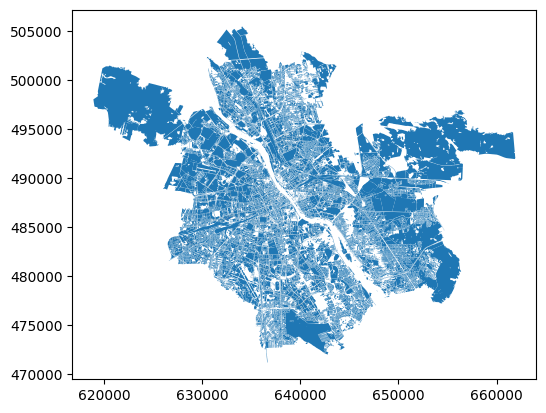

In [70]:
osm_landuse.plot()

Day 9 – Filter OSM land-use classes

Select meaningful land-use categories for urban analysis.

---



Explore land-use values

In [71]:
osm_landuse["landuse"].value_counts()

,count
landuse,
grass,72859
residential,14399
commercial,2354
farmland,1730
industrial,1593
retail,1396
construction,1277
forest,1243
flowerbed,1184


Filter urban-related classes

In [73]:
urban_landuse = osm_landuse[
    osm_landuse["landuse"].isin([
     "residential",
        "commercial",
        "industrial",
        "retail"
    ])
]

In [74]:
print(urban_landuse["landuse"].value_counts())

landuse
residential    14399
commercial      2354
industrial      1593
retail          1396
Name: count, dtype: int64


Geometry cleanup (optional)

In [75]:
urban_landuse = urban_landuse[urban_landuse.geometry.notnull()]

In [76]:
print(urban_landuse["landuse"].value_counts())

landuse
residential    14399
commercial      2354
industrial      1593
retail          1396
Name: count, dtype: int64


Area calculation

In [77]:
urban_landuse["area_ha"] = urban_landuse.geometry.area/10000

In [78]:
print(urban_landuse.head())

                                                               geometry fixme  \
element  id                                                                     
node     12666391292                      POINT (633885.222 492141.384)   NaN   
relation 5126911      POLYGON ((637303.666 486820.384, 637320.741 48...   NaN   
         6507131      POLYGON ((631261.123 489857.28, 631317.259 489...   NaN   
         6865568      POLYGON ((632875.82 487855.625, 632861.673 487...   NaN   
         7213718      MULTIPOLYGON (((635290.001 494846.661, 635306....   NaN   

                          landuse military  \
element  id                                  
node     12666391292  residential      NaN   
relation 5126911           retail      NaN   
         6507131      residential      NaN   
         6865568      residential      NaN   
         7213718       industrial      NaN   

                                                     name addr:city  \
element  id                           